In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [85]:
# Read image.
img = cv2.imread('../images/pingpong_1.jpeg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (500, 500))

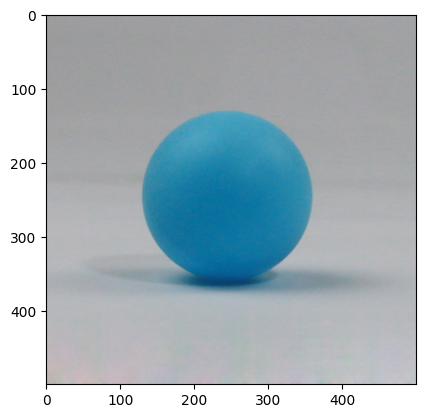

In [86]:
plt.imshow(img)
plt.show()

In [ ]:
R_BALL = 20
H = 100

colors_of_interest = ["#0976a1"]

In [107]:
from typing import List
import colorsys


def get_hsv_range_from_rgb(rgb: List[int], band_width: int):
    hsv = colorsys.rgb_to_hsv(*[color / 255 for color in rgb])

    lower_h = int(((hsv[0] - band_width) % 1) * 180)
    upper_h = int(((hsv[0] + band_width) % 1) * 180)

    lower_s = int(max(0, hsv[1] - band_width) * 255)
    upper_s = int(min(1, hsv[1] + band_width) * 255)

    lower_v = int(max(0, hsv[2] - band_width) * 255)
    upper_v = int(min(1, hsv[2] + band_width) * 255)

    return (lower_h, lower_s, lower_v), (upper_h, upper_s, upper_v)


In [108]:
def good_in_range(hsv, lower_b, upper_b):  # [170, 10, 50], [10, 180, 150]
    if lower_b[0] > upper_b[0]:
        mask_l = cv2.inRange(hsv, lower_b, (180, *upper_b[1:]))
        mask_h = cv2.inRange(hsv, (0, *lower_b[1:]), upper_b)
        mask = cv2.bitwise_or(mask_l, mask_h)

    else:
        mask = cv2.inRange(hsv, lower_b, upper_b)

    return mask


In [109]:
hsv_range = get_hsv_range_from_rgb([9, 118, 161], 0.3)
print(hsv_range)

((44, 164, 84), (152, 255, 237))


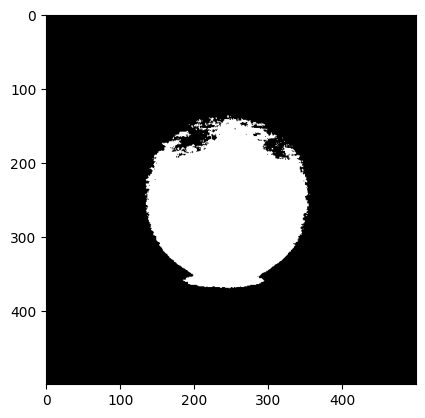

In [110]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
thresholded_img = good_in_range(hsv, hsv_range[0], hsv_range[1])

plt.imshow(thresholded_img, cmap="gray")
plt.show()

In [111]:
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(thresholded_img, (5, 5))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 1000, param1 = 50,
               param2 = 10, minRadius = 1, maxRadius = 300)
  


In [112]:
gray.shape

(500, 500)

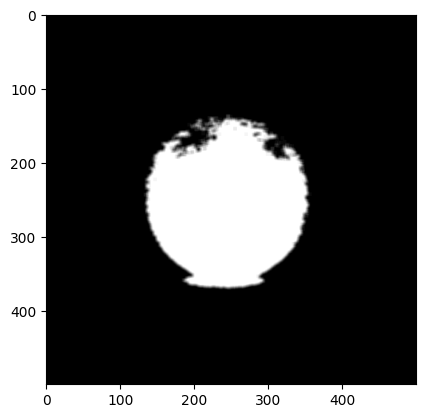

In [113]:
plt.imshow(gray_blurred, cmap="gray")
plt.show()

In [114]:
print(detected_circles)

[[[243.5 252.5 108.6]]]


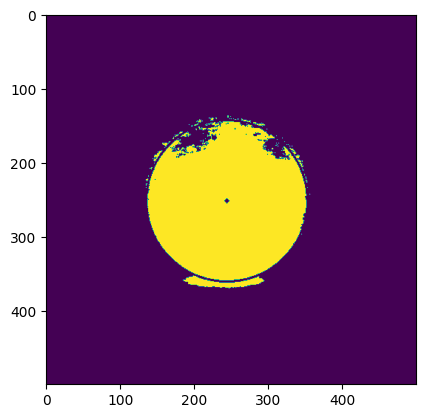

In [116]:
# Draw circles that are detected.
if detected_circles is not None:
    img_cpy = thresholded_img.copy()
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        img_cpy = cv2.circle(img_cpy, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        img_cpy = cv2.circle(img_cpy, (a, b), 1, (0, 0, 255), 3)
    plt.imshow(img_cpy)
    plt.show()